In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt


Bad key "text.kerning_factor" on line 4 in
C:\Users\Michael Ho\anaconda3\envs\PHYS247\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
Data=pd.read_csv('creditcard.csv')
Data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [7]:
Data.shape

(284807, 31)

In [8]:
Data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [9]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [10]:
Data.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [11]:
X=Data.drop(columns=['Class'])
y=Data.Class

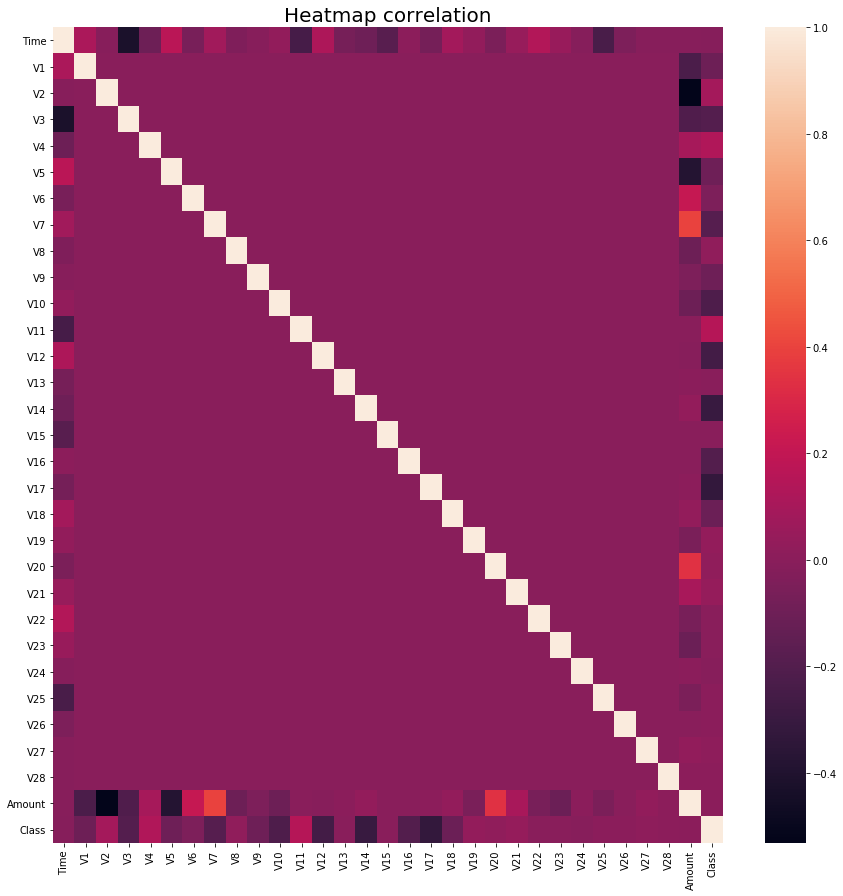

In [14]:
#Check if the features are corelated withc each other
plt.figure(figsize=(15,15))
sns.heatmap(Data.corr())
plt.title('Heatmap correlation',fontsize=20)
plt.show()

In [15]:
fraud=Data[Data['Class']==1]

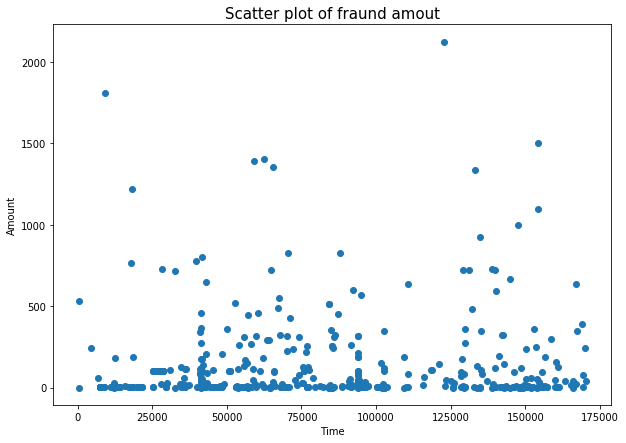

In [19]:
plt.figure(figsize=(10,7))
plt.scatter(fraud['Time'],fraud['Amount'])
plt.title('Scatter plot of fraund amout',fontsize=15)
plt.xlabel('Time')
plt.ylabel('Amount')
plt.show()

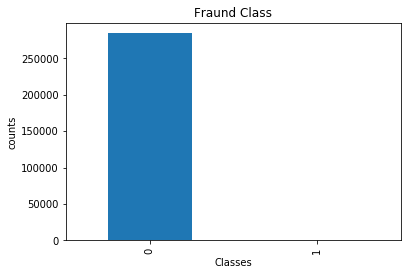

In [25]:
classcount=pd.value_counts(Data['Class'],sort=True).sort_index()
classcount.plot(kind='bar')
plt.title('Fraund Class')
plt.xlabel('Classes')
plt.ylabel('counts')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,f1_score,precision_score,recall_score,accuracy_score
from sklearn.utils import resample
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras import utils
from tensorflow.keras.optimizers import Adam

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

In [28]:
Train=pd.concat([X_train,y_train],axis=1)
Train_not_fraud=Train[Train.Class==0]
Train_fraud=Train[Train.Class==1]

In [29]:
fraud_sampled=resample(Train_fraud,replace=True,n_samples=len(Train_not_fraud),random_state=100)
sampled=pd.concat([Train_not_fraud,fraud_sampled])
sampled.Class.value_counts()

1    199014
0    199014
Name: Class, dtype: int64

In [30]:
y_train=sampled.Class
X_train=sampled.drop(columns=['Class'])

In [31]:
scaler = MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.fit_transform(X_test)

In [32]:
model=Sequential()

model.add(Dense(X_train.shape[1],  activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(100, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(50, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=1,activation='sigmoid'))

model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [33]:
model.fit(x=X_train,y=y_train,validation_data=(X_test,y_test),batch_size=32,epochs=10)

Epoch 1/10
12439/12439 [==============================] - 21s 2ms/step - loss: 0.1573 - accuracy: 0.9423 - val_loss: 0.0111 - val_accuracy: 0.9987
Epoch 2/10
12439/12439 [==============================] - 22s 2ms/step - loss: 0.1296 - accuracy: 0.9509 - val_loss: 0.0086 - val_accuracy: 0.9989
Epoch 3/10
12439/12439 [==============================] - 22s 2ms/step - loss: 0.1210 - accuracy: 0.9534 - val_loss: 0.0118 - val_accuracy: 0.9986
Epoch 4/10
12439/12439 [==============================] - 26s 2ms/step - loss: 0.1154 - accuracy: 0.9550 - val_loss: 0.0131 - val_accuracy: 0.9985
Epoch 5/10
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1097 - accuracy: 0.9564 - val_loss: 0.0181 - val_accuracy: 0.9965
Epoch 6/10
12439/12439 [==============================] - 20s 2ms/step - loss: 0.1107 - accuracy: 0.9572 - val_loss: 0.0128 - val_accuracy: 0.9989
Epoch 7/10
12439/12439 [==============================] - 21s 2ms/step - loss: 0.1061 - accuracy: 0.9578 - val_loss: 0

In [34]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                multiple                  930       
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  3100      
_________________________________________________________________
dropout_1 (Dropout)          multiple                  0         
_________________________________________________________________
dense_2 (Dense)              multiple                  5050      
_________________________________________________________________
dropout_2 (Dropout)          multiple                  0         
_________________________________________________________________
dense_3 (Dense)              multiple                  5

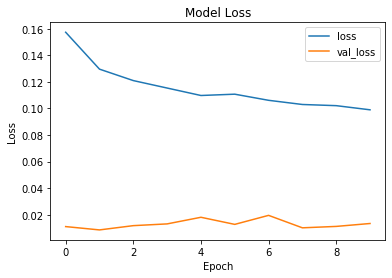

In [35]:
history=pd.DataFrame(model.history.history)
history[['loss','val_loss']].plot()
plt.title('Model Loss',fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.show()

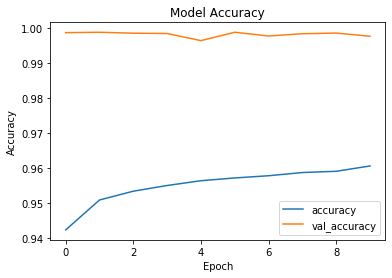

In [36]:
history[['accuracy','val_accuracy']].plot()
plt.title('Model Accuracy',fontsize=12)
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.show()

In [167]:
predictions = model.predict_classes(X_test)

In [168]:
print('confusion_matrix=\n',confusion_matrix(y_test,predictions))

confusion_matrix=
 [[85265    36]
 [   38   104]]


In [169]:
print('accuracy_score=',accuracy_score(y_test,predictions))

accuracy_score= 0.999133925541004


In [170]:
print('recall_score=',recall_score(y_test,predictions))

recall_score= 0.7323943661971831


In [171]:
print('f1_score=',f1_score(y_test,predictions))

f1_score= 0.7375886524822696


In [172]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85301
           1       0.74      0.73      0.74       142

    accuracy                           1.00     85443
   macro avg       0.87      0.87      0.87     85443
weighted avg       1.00      1.00      1.00     85443

